# Get the Rating Matrix

In [1]:
import pickle 

pickle_in = open("../datasets/rating_matrix.pickle","rb")
rating_matrix = pickle.load(pickle_in) 
pickle_in.close() 

In [2]:
type(rating_matrix)

dict

In [3]:
# !pip install apyori

In [4]:
# !pip install mlxtend  

In [5]:
# !pip install efficient-apriori

In [6]:
import pandas as pd 

data = pd.Series(rating_matrix).reset_index() 
data.columns = ["option_x", "option_y", "rating"] 

data.head() 

,option_x,option_y,rating
0,745321,666652,1
1,745321,751782,1
2,745321,751839,10
3,666652,751782,1
4,666652,751839,1


In [7]:
data_with_3 = pd.read_csv("../datasets/ratings_with_3_combinations.csv")[["rating", "bill"]]

data_with_3.head()

,rating,bill
0,1,"(745321, 666652)"
1,1,"(745321, 751782)"
2,10,"(745321, 751839)"
3,1,"(666652, 751782)"
4,1,"(666652, 751839)"


In [8]:
data_3_greater_1 = data_with_3[data_with_3.rating > 1] 

data_3_greater_1.head() 

,rating,bill
2,10,"(745321, 751839)"
5,151,"(751782, 751839)"
10,107,"(751873, 760125)"
11,12,"(772494, 754574)"
13,11,"(772494, 749358)"


In [9]:
len(data_with_3), len(data)

(5216080, 771062)

In [10]:
data.describe()

,option_x,option_y,rating
count,771062.000000,771062.000000,771062.000000
mean,735325.372226,735395.857417,2.418680
std,42364.768430,42085.392109,9.794105
min,16329.000000,10494.000000,1.000000
25%,714744.000000,714645.000000,1.000000
50%,751526.000000,751358.000000,1.000000
75%,760344.000000,760209.000000,2.000000
max,823758.000000,823758.000000,2254.000000


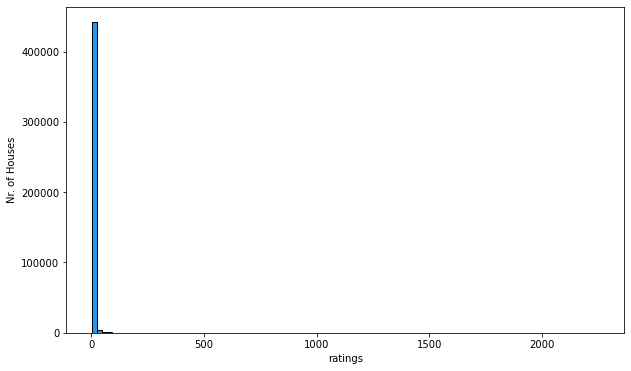

In [11]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

In [12]:
max(data_3_greater_1.rating),  min(data_3_greater_1.rating)

(2254, 2)

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

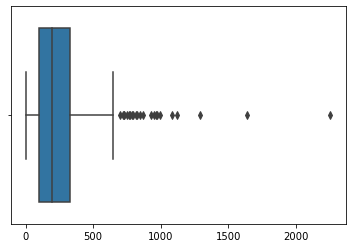

In [13]:
import seaborn as sns
sns.boxplot(data_3_greater_1['rating'].unique())

In [14]:
import numpy as np
data_3_greater_1_log = data_3_greater_1.copy() 
data_3_greater_1_log["rating"] = np.log(data_3_greater_1.rating) 

data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [15]:
max(data_3_greater_1_log.rating),  min(data_3_greater_1_log.rating)

(7.720461694599722, 0.6931471805599453)

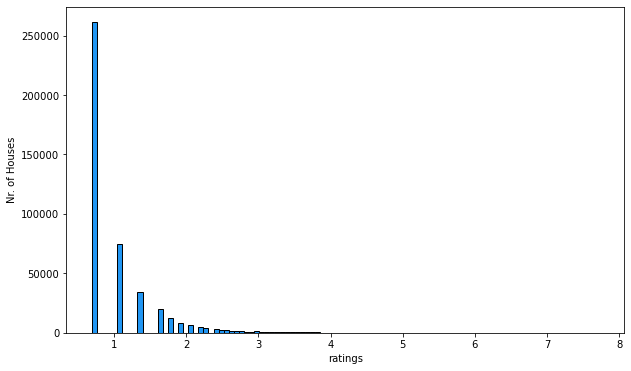

In [16]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1_log['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

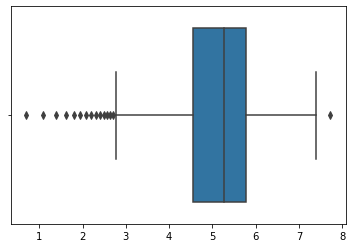

In [17]:
import seaborn as sns
sns.boxplot(data_3_greater_1_log['rating'].unique())

In [18]:
import numpy as np 
Q1 = np.percentile(data_3_greater_1_log['rating'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_3_greater_1_log['rating'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("data_3_greater_1_log has IQR:", IQR) 

data_3_greater_1_log has IQR: 0.6931471805599453


# Model 1: Matrix Factorization Using Keras 

#### Data Prep for MF 

In [19]:
data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [20]:
data_3_greater_1_log.bill.unique().shape

(448529,)

In [21]:
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [22]:
from ast import literal_eval

data_3_greater_1_log.bill = data_3_greater_1_log.bill.apply(literal_eval) 
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [23]:
type(data_3_greater_1_log.bill.iat[0])

tuple

In [24]:
statement = (772494, 754574, 749358) 
s_set = set(statement) 
tuple(s_set.difference([772494]))

(749358, 754574)

In [25]:
def split_bill(statement):
    return [
        (tuple(set(statement).difference([statement[0]])), statement[0]),
        (tuple(set(statement).difference([statement[1]])), statement[1]),
        (tuple(set(statement).difference([statement[2]])), statement[2])
    ]

In [26]:
data_3_greater_1_log["option_count"] = data_3_greater_1_log.bill.apply(lambda x: len(x))
data_3_greater_1_log.tail() 

,rating,bill,option_count
5211482,0.693147,"(774694, 767718, 767721)",3
5213307,0.693147,"(774590, 774319)",2
5213311,0.693147,"(774469, 774590, 774319)",3
5213576,0.693147,"(764896, 786771, 774571)",3
5215140,0.693147,"(748899, 748868, 752949)",3


In [27]:
sublist_by_2 = data_3_greater_1_log[data_3_greater_1_log.option_count == 2]

In [28]:
sublist_by_2_concat = pd.concat([
    sublist_by_2,
    pd.DataFrame(data_3_greater_1_log[data_3_greater_1_log.option_count == 2].bill.to_list(), columns=["LHS", "RHS"], index=sublist_by_2.index)
], axis=1)
sublist_by_2_concat.head()

,rating,bill,option_count,LHS,RHS
2,2.302585,"(745321, 751839)",2,745321,751839
5,5.017280,"(751782, 751839)",2,751782,751839
10,4.672829,"(751873, 760125)",2,751873,760125
11,2.484907,"(772494, 754574)",2,772494,754574
13,2.397895,"(772494, 749358)",2,772494,749358


In [29]:
sublist_by_3 = data_3_greater_1_log[data_3_greater_1_log.option_count == 3]
sublist_by_3.head() 

,rating,bill,option_count
22,0.693147,"(772494, 754574, 749358)",3
28,0.693147,"(754574, 745328, 745310)",3
44,1.098612,"(751649, 751591, 751532)",3
45,0.693147,"(751649, 751591, 751597)",3
46,0.693147,"(751649, 751595, 751532)",3


In [30]:
replicated_rows = pd.DataFrame(np.repeat(sublist_by_3.values, 3, axis=0), columns=sublist_by_3.columns)

sublists_by_3_reduced = []  
for item in sublist_by_3.bill.to_list():
    sublists_by_3_reduced += split_bill(item) 

sublists_by_3_reduced = pd.DataFrame(sublists_by_3_reduced, columns=["LHS", "RHS"])

sublist_by_3_concat = pd.concat([
    replicated_rows, 
    sublists_by_3_reduced
], axis=1)

sublist_by_3_concat.head() 

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [31]:
dataset_combined_MF = pd.concat([sublist_by_3_concat, sublist_by_2_concat], axis=0, ignore_index=True)
dataset_combined_MF.head()  

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [36]:
dataset_combined_MF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859833 entries, 0 to 859832
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        859833 non-null  object
 1   bill          859833 non-null  object
 2   option_count  859833 non-null  object
 3   LHS           859833 non-null  object
 4   RHS           859833 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 32.8+ MB


In [149]:
sublist_by_2_concat["LHS_C"] = sublist_by_2_concat.LHS.astype('category').cat.codes.values
sublist_by_2_concat["RHS_C"] = sublist_by_2_concat.RHS.astype('category').cat.codes.values

sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


### Building MF Model 

In [49]:
# from sklearn.utils import shuffle 
# from keras.models import Model 
# from keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Activation

# N = len(dataset_combined_MF.LHS.unique()) 
# M = len(dataset_combined_MF.RHS.unique()) 

# data_shuffled = shuffle(dataset_combined_MF) 

# # initialize the latent vector dimension 
# K = 10 
# mu = dataset_combined_MF.rating.mean() 
# epochs = 25 

# u = Input(shape=(1,))
# m = Input(shape=(1,))

# u_embedding = Embedding(N, K)(u) # u -> u_embdedding
# m_embedding = Embedding(M, K)(m) # m -> m_embedding 

# u_embedding = Flatten()(u_embedding) # (N, K)
# m_embedding = Flatten()(m_embedding) # (N, K)

# x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)
# x = Dense(400)(x)
# x = Activation('relu')(x)
# x = Dense(1)(x)

# model = Model(inputs=[u, m], outputs=x)  # Function 1 fulfilled

In [ ]:
# movie_input = keras.layers.Input(shape=[1],name='Item')
# movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
# movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

# user_input = keras.layers.Input(shape=[1],name='User')
# user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

# prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
# model = keras.Model([user_input, movie_input], prod)

In [150]:
from tensorflow import keras
from keras.optimizers import Adam 

n_rhs, n_lhs = len(sublist_by_2_concat.RHS_C.unique()), len(sublist_by_2_concat.LHS_C.unique())
n_latent_factors = 20

lhs_input = keras.layers.Input(shape=(1,), name="lhs-item") 
lhs_embedding = keras.layers.Embedding(n_lhs + 1, n_latent_factors, name="lhs-embeddings")(lhs_input) 
lhs_vec = keras.layers.Flatten(name="flatten-lhs")(lhs_embedding) 

rhs_input= keras.layers.Input(shape=(1,), name="rhs-item")
rhs_embedding = keras.layers.Embedding(n_rhs + 1, n_latent_factors, name="rhs-embeddings")(rhs_input) 
rhs_vec = keras.layers.Flatten(name="flatten-rhs")(rhs_embedding)

product = keras.layers.dot([lhs_vec, rhs_vec], axes=1, name="dot-product") 

model = keras.Model([rhs_input, lhs_input], product) 


In [151]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 rhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 lhs-embeddings (Embedding)     (None, 1, 20)        100860      ['lhs-item[0][0]']               
                                                                                                  
 rhs-embeddings (Embedding)     (None, 1, 20)        101820      ['rhs-item[0][0]']               
                                                                                            

In [153]:
from sklearn.utils import shuffle 
data_shuffled = shuffle(sublist_by_2_concat) 

history = model.fit(
    [sublist_by_2_concat.RHS_C, sublist_by_2_concat.LHS_C], 
    sublist_by_2_concat.rating, 
    epochs=100
    )

Epoch 1/100
7590/7590 [==============================] - 17s 2ms/step - loss: 0.4264 - mae: 0.4748 - mse: 0.4264
Epoch 2/100
7590/7590 [==============================] - 18s 2ms/step - loss: 0.3396 - mae: 0.4249 - mse: 0.3396
Epoch 3/100
7590/7590 [==============================] - 17s 2ms/step - loss: 0.2808 - mae: 0.3874 - mse: 0.2808
Epoch 4/100
7590/7590 [==============================] - 19s 3ms/step - loss: 0.2442 - mae: 0.3618 - mse: 0.2442
Epoch 5/100
7590/7590 [==============================] - 19s 2ms/step - loss: 0.2195 - mae: 0.3439 - mse: 0.2195
Epoch 6/100
7590/7590 [==============================] - 18s 2ms/step - loss: 0.2019 - mae: 0.3302 - mse: 0.2019
Epoch 7/100
7590/7590 [==============================] - 25s 3ms/step - loss: 0.1886 - mae: 0.3195 - mse: 0.1886
Epoch 8/100
7590/7590 [==============================] - 20s 3ms/step - loss: 0.1782 - mae: 0.3107 - mse: 0.1782
Epoch 9/100
7590/7590 [==============================] - 19s 2ms/step - loss: 0.1699 - mae: 0.30

In [156]:
sublist_by_2_concat.rating.max(), sublist_by_2_concat.rating.min() 

(7.720461694599722, 0.6931471805599453)

In [159]:
model.get_layer(name='lhs-embeddings').get_weights()

[array([[-1.8919633e-01, -1.6678388e-01, -2.0242344e-01, ...,
          1.5663257e-01,  1.5581018e-01,  1.7354497e-01],
        [ 2.1757825e-01,  1.7243199e-02,  1.7118968e-01, ...,
         -2.2582582e-01,  1.5866593e-02,  1.9119196e-01],
        [ 2.8901175e-01, -5.4801655e-01, -4.2496765e-01, ...,
         -4.1801688e-01, -4.3379935e-03,  5.4741704e-01],
        ...,
        [ 3.2770303e-01,  3.8734019e-02, -2.4871132e-04, ...,
         -1.6732519e-02, -6.8308443e-02,  4.1180453e-01],
        [ 2.4538913e-01, -1.3334420e-01,  2.3802704e-01, ...,
          2.6694182e-01, -1.5107200e-01,  9.9516533e-02],
        [-4.9810138e-02,  3.8502816e-02, -7.8081489e-03, ...,
         -9.4175823e-03,  2.9286016e-02,  3.8760677e-03]], dtype=float32)]

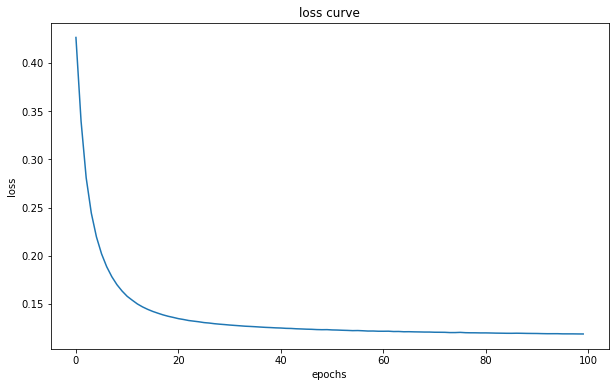

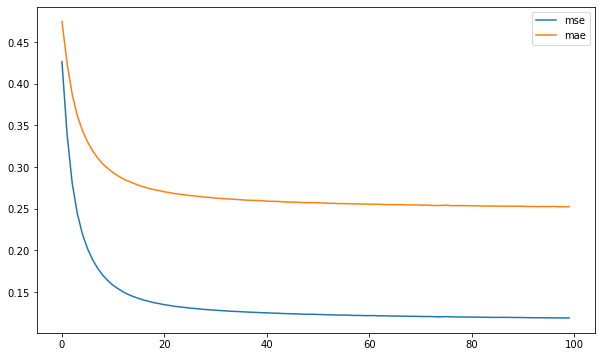

In [184]:
import matplotlib.pyplot as plt 

plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
pd.DataFrame(history.history)["loss"].plot(figsize=(10,6)) 
pd.DataFrame(history.history)[["mse", "mae"]].plot(figsize=(10,6))
plt.show() 

In [189]:
lhs_embddings = model.get_layer(name='lhs-embeddings').get_weights()[0]
lhs_embddings

array([[-1.8919633e-01, -1.6678388e-01, -2.0242344e-01, ...,
         1.5663257e-01,  1.5581018e-01,  1.7354497e-01],
       [ 2.1757825e-01,  1.7243199e-02,  1.7118968e-01, ...,
        -2.2582582e-01,  1.5866593e-02,  1.9119196e-01],
       [ 2.8901175e-01, -5.4801655e-01, -4.2496765e-01, ...,
        -4.1801688e-01, -4.3379935e-03,  5.4741704e-01],
       ...,
       [ 3.2770303e-01,  3.8734019e-02, -2.4871132e-04, ...,
        -1.6732519e-02, -6.8308443e-02,  4.1180453e-01],
       [ 2.4538913e-01, -1.3334420e-01,  2.3802704e-01, ...,
         2.6694182e-01, -1.5107200e-01,  9.9516533e-02],
       [-4.9810138e-02,  3.8502816e-02, -7.8081489e-03, ...,
        -9.4175823e-03,  2.9286016e-02,  3.8760677e-03]], dtype=float32)

In [190]:
rhs_embddings = model.get_layer(name='rhs-embeddings').get_weights()[0]
rhs_embddings

array([[ 0.2885845 ,  0.24961697, -0.22353339, ...,  0.2893922 ,
        -0.17789634, -0.23862965],
       [ 0.26551294,  0.01302331,  0.2628403 , ..., -0.2879019 ,
        -0.01544847,  0.30979297],
       [-0.19071133, -0.16720483, -0.1802397 , ...,  0.15463042,
         0.1612276 ,  0.1723042 ],
       ...,
       [-0.13801906, -0.23344277, -0.27822214, ..., -0.34374952,
        -0.05915472,  0.5128158 ],
       [-0.12609707,  0.4221885 , -0.02330181, ..., -0.6256042 ,
        -0.09161535, -0.03416852],
       [ 0.02206794,  0.02889726, -0.03546559, ...,  0.02652128,
        -0.0357474 ,  0.02859039]], dtype=float32)

In [191]:
def recommend(option_in_category, number_of_movies=5):
  options = lhs_embddings[option_in_category]@rhs_embddings.T
  mids = np.argpartition(options, -number_of_movies)[-number_of_movies:]
  
  return mids

In [193]:
recommend(2524)

array([2100, 4248, 2490, 2559, 2065], dtype=int64)

In [194]:
sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


In [200]:
sublist_by_2_concat[sublist_by_2_concat.RHS_C == 2100].head()     # RHS = 721495, LHS = 751839

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
776970,0.693147,"(760352, 721495)",2,760352,721495,3719,2100
776972,0.693147,"(760065, 721495)",2,760065,721495,3698,2100
776973,1.791759,"(767779, 721495)",2,767779,721495,4142,2100
776974,0.693147,"(760332, 721495)",2,760332,721495,3715,2100
1168575,2.079442,"(714275, 721495)",2,714275,721495,1741,2100


In [205]:
# RHS = 721495, LHS = 751839 
sublist_by_2_concat.loc[(sublist_by_2_concat.RHS== 721495) & (sublist_by_2_concat.LHS == 751839)]


,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C


# Model 2: Apriori (apyori Module)

In [52]:
data_3_greater_1

,rating,bill
2,10,"(745321, 751839)"
5,151,"(751782, 751839)"
10,107,"(751873, 760125)"
11,12,"(772494, 754574)"
13,11,"(772494, 749358)"
...,...,...
5211482,2,"(774694, 767718, 767721)"
5213307,2,"(774590, 774319)"
5213311,2,"(774469, 774590, 774319)"
5213576,2,"(764896, 786771, 774571)"


In [53]:
from apyori import apriori 

In [54]:
transactions = [] 

for index,row in data_greater_1.iterrows(): 
    transaction = [str(row.option_x), str(row.option_y)]

    for i in range(row.rating):
        transactions.append(transaction) 

In [55]:
associations = apriori(
    transactions,
    min_length = 2,
    min_support = 0.001,
    min_confidence = 0.001,
    min_lift = 0.001
)

associations = list(associations)
len(associations)

533

In [56]:
association = associations[100]
print(association)
print("support", association.support)
print(association.ordered_statistics)
print("right", association.ordered_statistics[0].items_add)
print("left", association.ordered_statistics[0].items_base)
print("confidence", association.ordered_statistics[0].confidence)
print("lift", association.ordered_statistics[0].lift)


RelationRecord(items=frozenset({'714981'}), support=0.0010121434775095435, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'714981'}), confidence=0.0010121434775095435, lift=1.0)])
support 0.0010121434775095435
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'714981'}), confidence=0.0010121434775095435, lift=1.0)]
right frozenset({'714981'})
left frozenset()
confidence 0.0010121434775095435
lift 1.0


In [57]:
rules = [] 
for association in associations:
    if len(association.ordered_statistics) > 1: 
        rules.append(association)

In [58]:
len(rules)

4

In [59]:
rules

[RelationRecord(items=frozenset({'751581', '751600'}), support=0.001021120359793442, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'751581', '751600'}), confidence=0.001021120359793442, lift=1.0), OrderedStatistic(items_base=frozenset({'751581'}), items_add=frozenset({'751600'}), confidence=0.0792314836312979, lift=6.939267030030741), OrderedStatistic(items_base=frozenset({'751600'}), items_add=frozenset({'751581'}), confidence=0.0894319596409618, lift=6.93926703003074)]),
 RelationRecord(items=frozenset({'753517', '753600'}), support=0.0012432981963199272, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'753517', '753600'}), confidence=0.0012432981963199272, lift=1.0), OrderedStatistic(items_base=frozenset({'753517'}), items_add=frozenset({'753600'}), confidence=0.08947510094212652, lift=4.467295221524749), OrderedStatistic(items_base=frozenset({'753600'}), items_add=frozenset({'753517'}), confidence=0.0620751475311

In [60]:
import string 
transactions_with_3 = [] 

for index,row in data_3_greater_1.iterrows(): 
    transaction = list(tuple(map(int, row.bill.translate(str.maketrans("", "", string.punctuation)).split(" "))))
    
    transactions_with_3.append(transaction)

In [61]:
from apyori import apriori 

associations_with_3 = apriori(
    transactions,
    min_length = 2,
    min_support = 0.001,
    min_confidence = 0.001,
    min_lift = 0.001
)

associations_with_3 = list(associations_with_3)
len(associations_with_3)

533

# Model 3: Apriori (mlxtend Module)

In [62]:
from efficient_apriori import apriori 

In [63]:
transactions_with_3 = list(map(lambda x: tuple(x), transactions_with_3))

In [64]:
itemsets, rules = apriori(transactions_with_3, min_support=0.001, min_confidence=0.001)

In [65]:
# itemsets

In [66]:
rules

[{751600} -> {751581},
 {751581} -> {751600},
 {753600} -> {753517},
 {753517} -> {753600},
 {753609} -> {753600},
 {753600} -> {753609},
 {778629} -> {778581},
 {778581} -> {778629}]